# Mobile Customer Churn

The goal is to build a simple predictive model to predict churn from available features. 

The data was generated based on a real dataset provided by Optus. The data is simulated but the column headings are the same. (Note that I'm not sure if all of the real relationships in this data are preserved, so interpretation of results are taken at an analytical level).  

The data is provided in file `MobileCustomerChurn.csv` and column headings are defined in a file `MobileChurnDataDictionary.csv`.

 Building and evaluating a __predictive model for churn__ - predict the value of the CHURN_IND field in the data from some of the other fields.  Note that the three `RECON` fields should not be used as they indicate whether the customer reconnected after having churned. 

__Disclaimer:__ Evaluation on the _accuracy_ of the model and the _process_ that is generated is used through a simple model such as Logistic Regression or any additional advanced methods. Thereby, I have explored the data, built a model using a selection of features and finding out which features provide the most accurate results.  

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Modelling and Value Prediction
Utilising predictive models and evaluating the accuracy of the data modelling, this will process data types and display accurate results to support an informed conclusion on data. It will infer statistical modeling and primarily apply statistical analysis to a dataset. The statistical model will observe data and indicate results relative to the datasets.

In [251]:
churn = pd.read_csv("files/MobileCustomerChurn.csv", na_values=["NA", "#VALUE!"], index_col='INDEX')
churn.head()

,CUST_ID,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,...,CONTRACT_STATUS,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE,RECON_SMS_NEXT_MTH,RECON_TELE_NEXT_MTH,RECON_EMAIL_NEXT_MTH
INDEX,,,,,,,,,,,,,,,,,,,,,
1,1,46,1,30.0,CONSUMER,46,54.54,NON BYO,15,0,...,OFF-CONTRACT,24,SAMSUNG,1,61.40,COUNTRY,WA,NaN,NaN,NaN
2,2,60,3,55.0,CONSUMER,59,54.54,NON BYO,5,0,...,OFF-CONTRACT,24,APPLE,1,54.54,METRO,NSW,NaN,NaN,NaN
3,5,65,1,29.0,CONSUMER,65,40.90,BYO,15,0,...,OFF-CONTRACT,12,APPLE,1,2.50,COUNTRY,WA,NaN,NaN,NaN
4,6,31,1,51.0,CONSUMER,31,31.81,NON BYO,31,0,...,OFF-CONTRACT,24,APPLE,1,6.48,COUNTRY,VIC,NaN,NaN,NaN
5,8,95,1,31.0,CONSUMER,95,54.54,NON BYO,0,0,...,OFF-CONTRACT,24,APPLE,1,100.22,METRO,NSW,NaN,NaN,NaN


In [252]:
churn['CHURN_IND'].unique()

array([1, 0])

In [253]:
churn['CHURN_IND'].head()

INDEX
1    1
2    1
3    1
4    1
5    1
Name: CHURN_IND, dtype: int64

In [254]:
churn['CHURN_IND'].describe()

count    46206.000000
mean         0.385015
std          0.486604
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: CHURN_IND, dtype: float64

In [255]:
churn.describe()

,CUST_ID,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,SERVICE_TENURE,PLAN_ACCESS_FEE,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,PREV_CONTRACT_DURATION,CHURN_IND,MONTHLY_SPEND,RECON_SMS_NEXT_MTH,RECON_TELE_NEXT_MTH,RECON_EMAIL_NEXT_MTH
count,46206.000000,46206.000000,46206.000000,46130.000000,46206.000000,46206.000000,46206.000000,46206.000000,46206.000000,46206.000000,46206.000000,46206.000000,28416.000000,28416.000000,28416.000000
mean,42335.196879,45.874627,1.555707,41.411836,50.318617,51.364858,10.846708,8.237112,20.349825,15.249968,0.385015,75.188029,0.014640,0.191125,0.007038
std,22100.432751,33.077927,0.835529,15.263726,51.925537,20.855419,9.769887,8.341476,8.034631,10.982958,0.486604,73.519041,0.120108,0.393194,0.083600
min,1.000000,0.000000,1.000000,-4.000000,0.000000,8.180000,0.000000,0.000000,0.000000,0.000000,0.000000,1.020000,0.000000,0.000000,0.000000
25%,24951.750000,14.000000,1.000000,28.000000,11.000000,36.360000,3.000000,0.000000,24.000000,0.000000,0.000000,36.360000,0.000000,0.000000,0.000000
50%,43261.000000,44.000000,1.000000,40.000000,35.000000,54.540000,8.000000,7.000000,24.000000,24.000000,0.000000,54.540000,0.000000,0.000000,0.000000
75%,61132.750000,77.000000,2.000000,52.000000,69.000000,72.720000,16.000000,16.000000,24.000000,24.000000,1.000000,84.530000,0.000000,0.000000,0.000000
max,79500.000000,120.000000,4.000000,116.000000,259.000000,234.540000,147.000000,24.000000,36.000000,36.000000,1.000000,1965.890000,1.000000,1.000000,1.000000


In [256]:
churn['CHURN_IND'].count()

46206

In [257]:
churn = churn.drop(['RECON_SMS_NEXT_MTH', 'RECON_TELE_NEXT_MTH', 'RECON_EMAIL_NEXT_MTH', 'CUST_ID'], axis = 1)

In [258]:
churn.head()

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,CONTRACT_STATUS,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE
INDEX,,,,,,,,,,,,,,,,,
1,46,1,30.0,CONSUMER,46,54.54,NON BYO,15,0,24,OFF-CONTRACT,24,SAMSUNG,1,61.40,COUNTRY,WA
2,60,3,55.0,CONSUMER,59,54.54,NON BYO,5,0,24,OFF-CONTRACT,24,APPLE,1,54.54,METRO,NSW
3,65,1,29.0,CONSUMER,65,40.90,BYO,15,0,12,OFF-CONTRACT,12,APPLE,1,2.50,COUNTRY,WA
4,31,1,51.0,CONSUMER,31,31.81,NON BYO,31,0,24,OFF-CONTRACT,24,APPLE,1,6.48,COUNTRY,VIC
5,95,1,31.0,CONSUMER,95,54.54,NON BYO,0,0,24,OFF-CONTRACT,24,APPLE,1,100.22,METRO,NSW


In [259]:
churn.isna().sum()

ACCOUNT_TENURE                   0
ACCT_CNT_SERVICES                0
AGE                             76
CFU                              0
SERVICE_TENURE                   0
PLAN_ACCESS_FEE                  0
BYO_PLAN_STATUS                  0
PLAN_TENURE                      0
MONTHS_OF_CONTRACT_REMAINING     0
LAST_FX_CONTRACT_DURATION        0
CONTRACT_STATUS                  0
PREV_CONTRACT_DURATION           0
HANDSET_USED_BRAND               0
CHURN_IND                        0
MONTHLY_SPEND                    0
COUNTRY_METRO_REGION             1
STATE                            1
dtype: int64

In [260]:
mean_age = churn['AGE'].mean()
churn['AGE'] =churn['AGE'].fillna(mean_age)
churn.isna().sum()

ACCOUNT_TENURE                  0
ACCT_CNT_SERVICES               0
AGE                             0
CFU                             0
SERVICE_TENURE                  0
PLAN_ACCESS_FEE                 0
BYO_PLAN_STATUS                 0
PLAN_TENURE                     0
MONTHS_OF_CONTRACT_REMAINING    0
LAST_FX_CONTRACT_DURATION       0
CONTRACT_STATUS                 0
PREV_CONTRACT_DURATION          0
HANDSET_USED_BRAND              0
CHURN_IND                       0
MONTHLY_SPEND                   0
COUNTRY_METRO_REGION            1
STATE                           1
dtype: int64

In [261]:
mean_age

41.41183611532625

In [262]:
chrun = churn.dropna()
churn.isna().sum()

ACCOUNT_TENURE                  0
ACCT_CNT_SERVICES               0
AGE                             0
CFU                             0
SERVICE_TENURE                  0
PLAN_ACCESS_FEE                 0
BYO_PLAN_STATUS                 0
PLAN_TENURE                     0
MONTHS_OF_CONTRACT_REMAINING    0
LAST_FX_CONTRACT_DURATION       0
CONTRACT_STATUS                 0
PREV_CONTRACT_DURATION          0
HANDSET_USED_BRAND              0
CHURN_IND                       0
MONTHLY_SPEND                   0
COUNTRY_METRO_REGION            1
STATE                           1
dtype: int64

<AxesSubplot:xlabel='MONTHLY_SPEND', ylabel='CHURN_IND'>

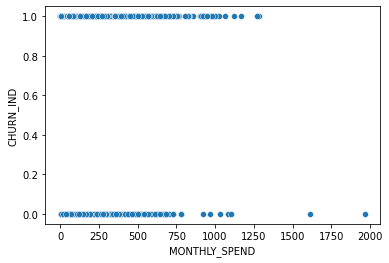

In [263]:
sns.scatterplot(x = 'MONTHLY_SPEND', y = 'CHURN_IND', data = churn)

<AxesSubplot:xlabel='MONTHLY_SPEND', ylabel='PLAN_ACCESS_FEE'>

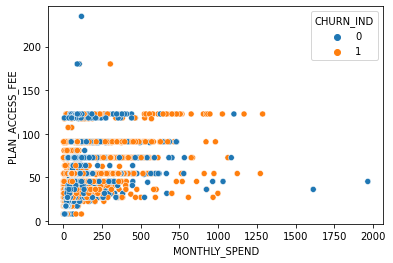

In [264]:
sns.scatterplot(x = 'MONTHLY_SPEND', y = 'PLAN_ACCESS_FEE', hue = 'CHURN_IND', data = churn)

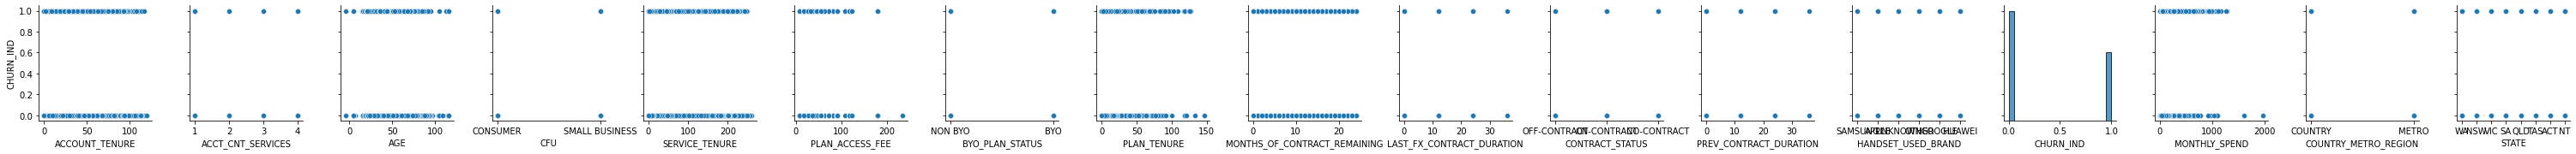

In [265]:
sns.pairplot(churn, x_vars = churn.columns, y_vars = ['CHURN_IND'])

In [266]:
churn['CONTRACT_STATUS'].unique()

array(['OFF-CONTRACT', 'ON-CONTRACT', 'NO-CONTRACT'], dtype=object)

In [267]:
churn['CONTRACT_STATUS'] = churn['CONTRACT_STATUS'].astype('category')
churn['CONTRACT_STATUS'].cat.codes

INDEX
1        1
2        1
3        1
4        1
5        1
        ..
46202    0
46203    1
46204    2
46205    1
46206    0
Length: 46206, dtype: int8

In [268]:
churn['CONTRACT_STATUS_cat'] = churn['CONTRACT_STATUS'].cat.codes
churn.head()

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,CONTRACT_STATUS,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE,CONTRACT_STATUS_cat
INDEX,,,,,,,,,,,,,,,,,,
1,46,1,30.0,CONSUMER,46,54.54,NON BYO,15,0,24,OFF-CONTRACT,24,SAMSUNG,1,61.40,COUNTRY,WA,1
2,60,3,55.0,CONSUMER,59,54.54,NON BYO,5,0,24,OFF-CONTRACT,24,APPLE,1,54.54,METRO,NSW,1
3,65,1,29.0,CONSUMER,65,40.90,BYO,15,0,12,OFF-CONTRACT,12,APPLE,1,2.50,COUNTRY,WA,1
4,31,1,51.0,CONSUMER,31,31.81,NON BYO,31,0,24,OFF-CONTRACT,24,APPLE,1,6.48,COUNTRY,VIC,1
5,95,1,31.0,CONSUMER,95,54.54,NON BYO,0,0,24,OFF-CONTRACT,24,APPLE,1,100.22,METRO,NSW,1


In [269]:
# one-hot encoding
#[0 0 1 0 0]
#[0 1 0 0 0]
#[0 0 1 0 0]
churn = pd.get_dummies(churn, columns = ['CONTRACT_STATUS'])
churn.head()

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE,CONTRACT_STATUS_cat,CONTRACT_STATUS_NO-CONTRACT,CONTRACT_STATUS_OFF-CONTRACT,CONTRACT_STATUS_ON-CONTRACT
INDEX,,,,,,,,,,,,,,,,,,,,
1,46,1,30.0,CONSUMER,46,54.54,NON BYO,15,0,24,24,SAMSUNG,1,61.40,COUNTRY,WA,1,0,1,0
2,60,3,55.0,CONSUMER,59,54.54,NON BYO,5,0,24,24,APPLE,1,54.54,METRO,NSW,1,0,1,0
3,65,1,29.0,CONSUMER,65,40.90,BYO,15,0,12,12,APPLE,1,2.50,COUNTRY,WA,1,0,1,0
4,31,1,51.0,CONSUMER,31,31.81,NON BYO,31,0,24,24,APPLE,1,6.48,COUNTRY,VIC,1,0,1,0
5,95,1,31.0,CONSUMER,95,54.54,NON BYO,0,0,24,24,APPLE,1,100.22,METRO,NSW,1,0,1,0


In [270]:
df = churn[['PREV_CONTRACT_DURATION', 'MONTHLY_SPEND']]
df.head()

,PREV_CONTRACT_DURATION,MONTHLY_SPEND
INDEX,,
1,24,61.40
2,24,54.54
3,12,2.50
4,24,6.48
5,24,100.22


In [271]:
df.isna().sum()

PREV_CONTRACT_DURATION    0
MONTHLY_SPEND             0
dtype: int64

In [240]:
features = [feature for feature in df.columns if df[feature].dtypes == 'O']
features

[]

In [272]:
for feature in categorical_features:
    data = df.copy()
    data.groupby(feature)['CHURN_IND'].sum().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('count of CHURN_IND')
    plt.title(feature)
    plt.show()

In [274]:
for feature in categorical_features:
    print('Feature:'.format(feature, len(df[feature].unique())))

In [187]:
df.columns

Index(['PREV_CONTRACT_DURATION', 'MONTHLY_SPEND'], dtype='object')

In [ ]:
X = df.iloc[:, : -1]
y = df.CHURN_IND

In [ ]:
import statsmodels.api as sm
logisticalmodel = sm.Logit(y,X)
result = logisticalmodel.fit()
print(result.summary2())

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)